In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df_train = pd.read_csv("train.csv")
df_train_tmp = df_train.copy(deep=True)
data_val = pd.read_csv("test.csv")

all_data = [df_train_tmp, data_val]

In [3]:
# Сhecking for duplicates
print(f'Duplicates in test set: {data_val.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train),1)}%)')
print(f'Duplicates in train set: {df_train.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train),1)}%)')

Duplicates in test set: 0, (0.0%)
Duplicates in train set: 0, (0.0%)


C:\Users\New\AppData\Local\Temp\ipykernel_39224\3901792730.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,2,1)


<Axes: xlabel='VRDeck', ylabel='Count'>

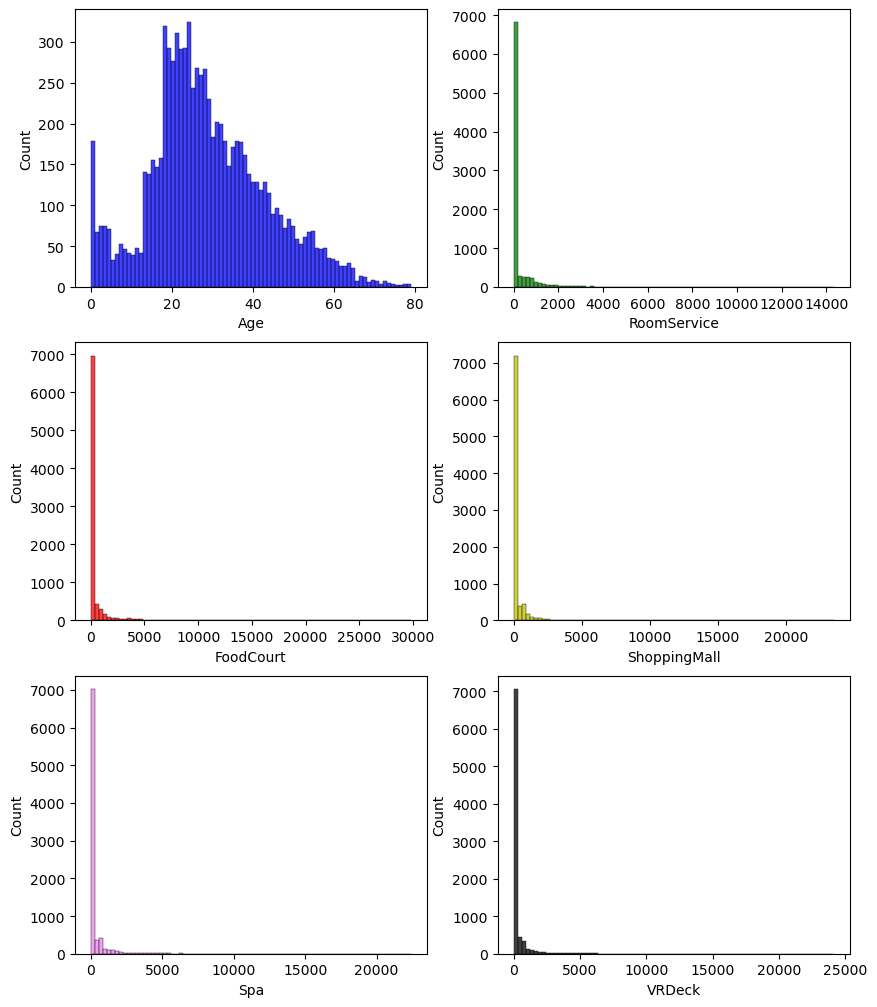

In [4]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.subplots_adjust(top = 4)
plt.subplot(6,2,1)
sns.histplot(df_train.Age, color = 'b',  bins = 80)
plt.subplot(6,2,2)
sns.histplot(df_train.RoomService, color = 'g', bins = 80)
plt.subplot(6,2,3)
sns.histplot(df_train.FoodCourt, color = 'r', bins = 80)
plt.subplot(6,2,4)
sns.histplot(df_train.ShoppingMall, color = 'y', bins = 80)
plt.subplot(6,2,5)
sns.histplot(df_train.Spa, color = 'violet', bins = 80)
plt.subplot(6,2,6)
sns.histplot(df_train.VRDeck, color = 'black', bins = 80)

In [5]:
# Devide into groups by age:
for dataset in all_data: 
    dataset['Age_group'] = np.nan
    dataset.loc[dataset.Age <= 10, 'Age_group'] = 'Age_0_10'
    dataset.loc[(dataset.Age > 10) & (dataset.Age <= 20), 'Age_group'] = 'Age_10_20'
    dataset.loc[(dataset.Age > 20) & (dataset.Age <= 30), 'Age_group'] = 'Age_20_30'
    dataset.loc[(dataset.Age > 30) & (dataset.Age <= 40), 'Age_group'] = 'Age_30_40'
    dataset.loc[(dataset.Age > 40) & (dataset.Age <= 50), 'Age_group'] = 'Age_40_50'
    dataset.loc[dataset.Age > 50, 'Age_group'] = 'Age_50+'

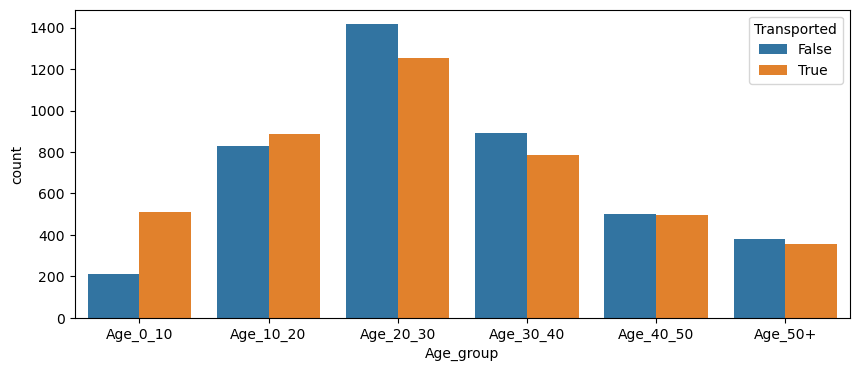

In [6]:
plt.figure(figsize=(10,4))
g = sns.countplot(data=all_data[0], x = 'Age_group', hue='Transported', \
                  order=['Age_0_10','Age_10_20','Age_20_30','Age_30_40','Age_40_50','Age_50+'])

In [7]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for dataset in all_data: 
    dataset['Expenditure'] = dataset[exp_feats].sum(axis=1)
    dataset['No_spending']=(dataset['Expenditure']==0).astype(int)

<Axes: xlabel='No_spending', ylabel='count'>

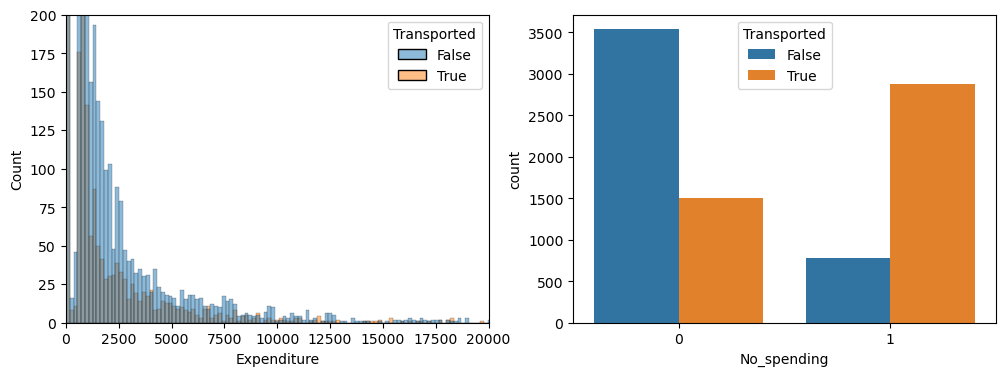

In [8]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data = all_data[0], x = 'Expenditure', hue = 'Transported', bins = 200)
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=all_data[0], x='No_spending', hue='Transported')

<Axes: xlabel='Group_size', ylabel='count'>

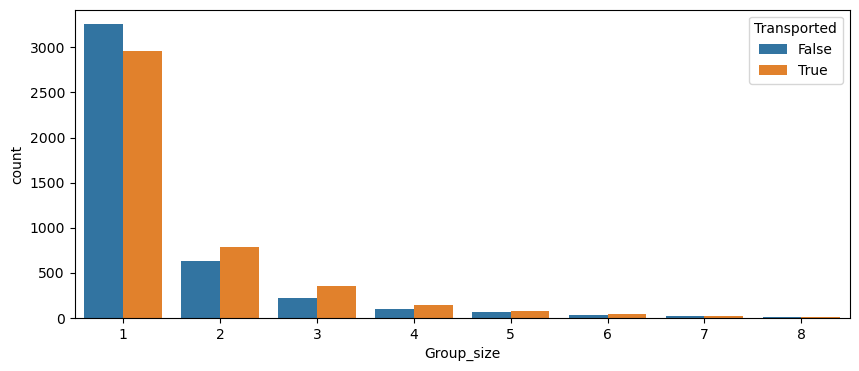

In [9]:
for dataset in all_data:
    dataset['Group_size'] = dataset['PassengerId'].apply(lambda x: x.split('_')[1]).astype(int)
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
plt.figure(figsize=(10,4))
sns.countplot(data = all_data[0], x = 'Group_size', hue = 'Transported')

In [10]:
all_data[0][["Cabin_deck", "Cabin_number", "Cabin_side"]] = all_data[0]['Cabin'].str.split("/", expand=True)
all_data[0] = all_data[0].drop('Cabin', axis=1)
all_data[0]['Cabin_number'] = pd.to_numeric(all_data[0]['Cabin_number'], errors='coerce')

In [11]:
all_data[1][["Cabin_deck", "Cabin_number", "Cabin_side"]] = all_data[1]['Cabin'].str.split("/", expand=True)
all_data[1] = all_data[1].drop('Cabin', axis=1)
all_data[1]['Cabin_number'] = pd.to_numeric(all_data[1]['Cabin_number'], errors='coerce')

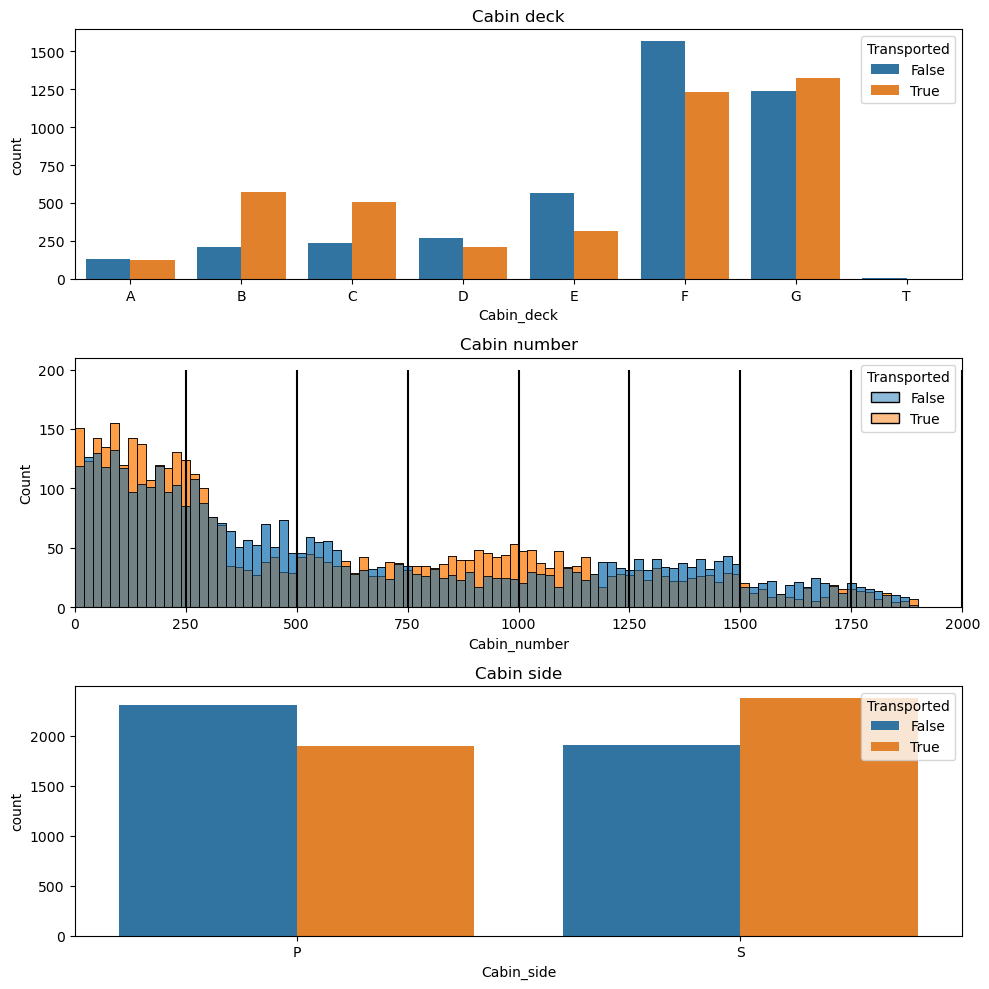

In [12]:
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.countplot(data = all_data[0], x = 'Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=all_data[0], x='Cabin_number', hue='Transported',binwidth=20)

plt.subplot(3,1,2)
sns.histplot(data=all_data[0], x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(250, ymin=0, ymax=200, color='black')
plt.vlines(500, ymin=0, ymax=200, color='black')
plt.vlines(750, ymin=0, ymax=200, color='black')
plt.vlines(1000, ymin=0, ymax=200, color='black')
plt.vlines(1250, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1750, ymin=0, ymax=200, color='black')
plt.vlines(2000, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=all_data[0], x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

C:\Users\New\AppData\Local\Temp\ipykernel_39224\4038168953.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,1)


<Axes: ylabel='VRDeck'>

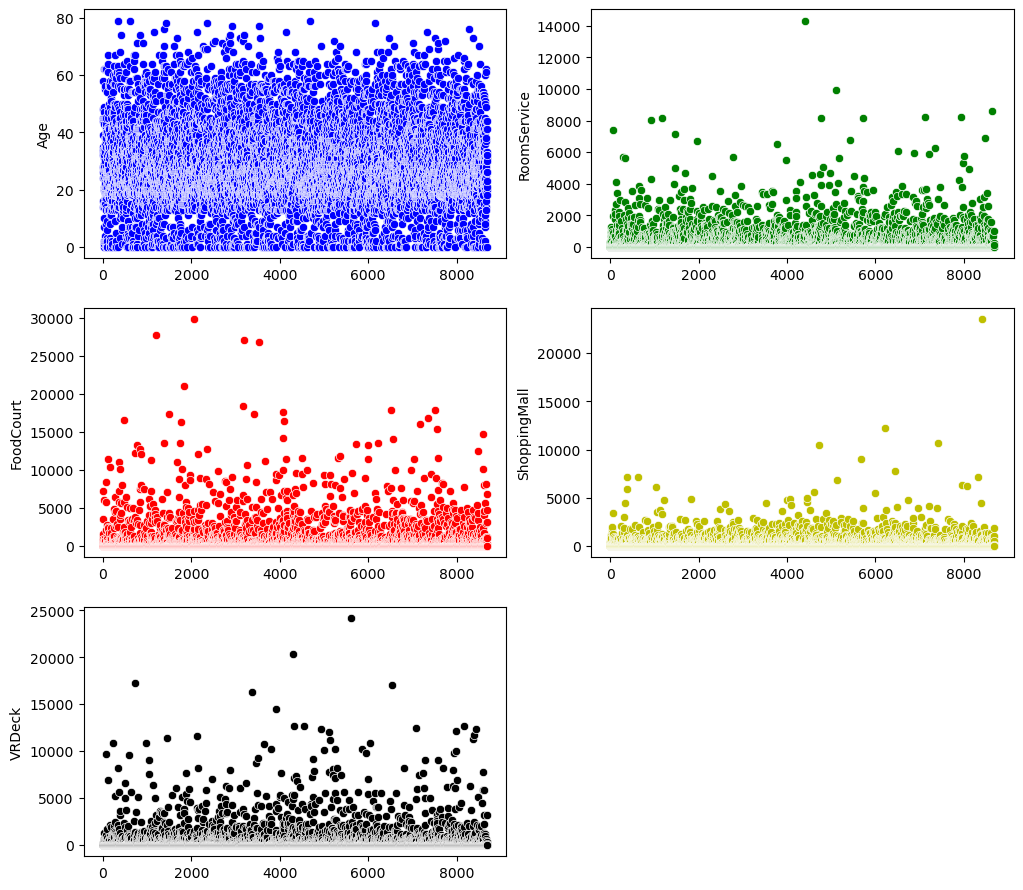

In [13]:
fig, ax = plt.subplots(figsize = (12,5))
plt.subplots_adjust(top = 3)
plt.subplot(5,2,1)
sns.scatterplot(data= all_data[0], x = all_data[0].index, y = all_data[0].Age, color = 'b')
plt.subplot(5,2,2)
sns.scatterplot(data= all_data[0], x = all_data[0].index, y = all_data[0].RoomService, color = 'g')
plt.subplot(5,2,3)
sns.scatterplot(data= all_data[0], x = all_data[0].index, y = all_data[0].FoodCourt, color = 'r')
plt.subplot(5,2,4)
sns.scatterplot(data= all_data[0], x = all_data[0].index, y = all_data[0].ShoppingMall, color = 'y')
plt.subplot(5,2,5)
sns.scatterplot(data= all_data[0], x = all_data[0].index, y = all_data[0].VRDeck, color = 'black')

In [14]:
# Data lost:
for dataset in all_data:
    dataset.isnull().sum().sort_values(ascending=False)
    for col in dataset.columns:
        missing_values = dataset[col].isnull().sum() / dataset[col].count()
        print('{} - {}%'.format(col, round(missing_values*100)))
    print('\n')

PassengerId - 0%
HomePlanet - 2%
CryoSleep - 3%
Destination - 2%
Age - 2%
VIP - 2%
RoomService - 2%
FoodCourt - 2%
ShoppingMall - 2%
Spa - 2%
VRDeck - 2%
Name - 2%
Transported - 0%
Age_group - 2%
Expenditure - 0%
No_spending - 0%
Group_size - 0%
Group - 0%
Cabin_deck - 2%
Cabin_number - 2%
Cabin_side - 2%


PassengerId - 0%
HomePlanet - 2%
CryoSleep - 2%
Destination - 2%
Age - 2%
VIP - 2%
RoomService - 2%
FoodCourt - 3%
ShoppingMall - 2%
Spa - 2%
VRDeck - 2%
Name - 2%
Age_group - 2%
Expenditure - 0%
No_spending - 0%
Group_size - 0%
Group - 0%
Cabin_deck - 2%
Cabin_number - 2%
Cabin_side - 2%




In [15]:
all_data[0].isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin_side      199
Cabin_number    199
Cabin_deck      199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age_group       179
Age             179
Transported       0
Expenditure       0
No_spending       0
Group_size        0
Group             0
PassengerId       0
dtype: int64

<Axes: xlabel='Na_count', ylabel='count'>

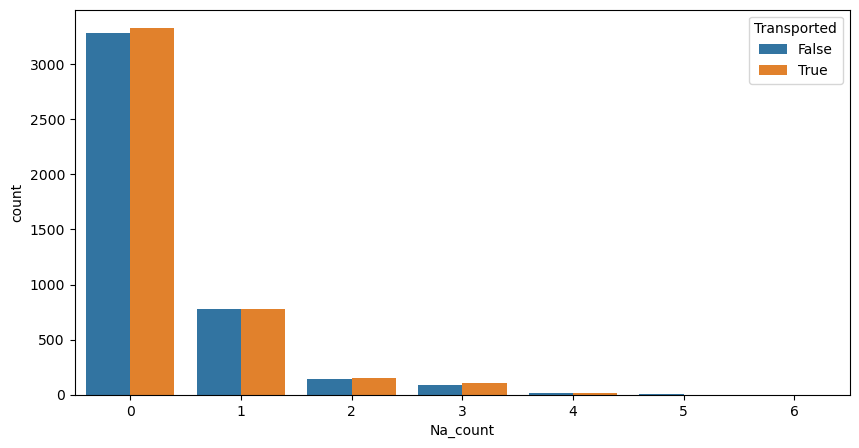

In [16]:
all_data[0]['Na_count'] = all_data[0].isna().sum(axis=1)
all_data[1]['Na_count'] = all_data[1].isna().sum(axis=1)
plt.figure(figsize=(10,5))
sns.countplot(data = all_data[0], x= 'Na_count', hue = 'Transported')

<Axes: xlabel='Cabin_side', ylabel='count'>

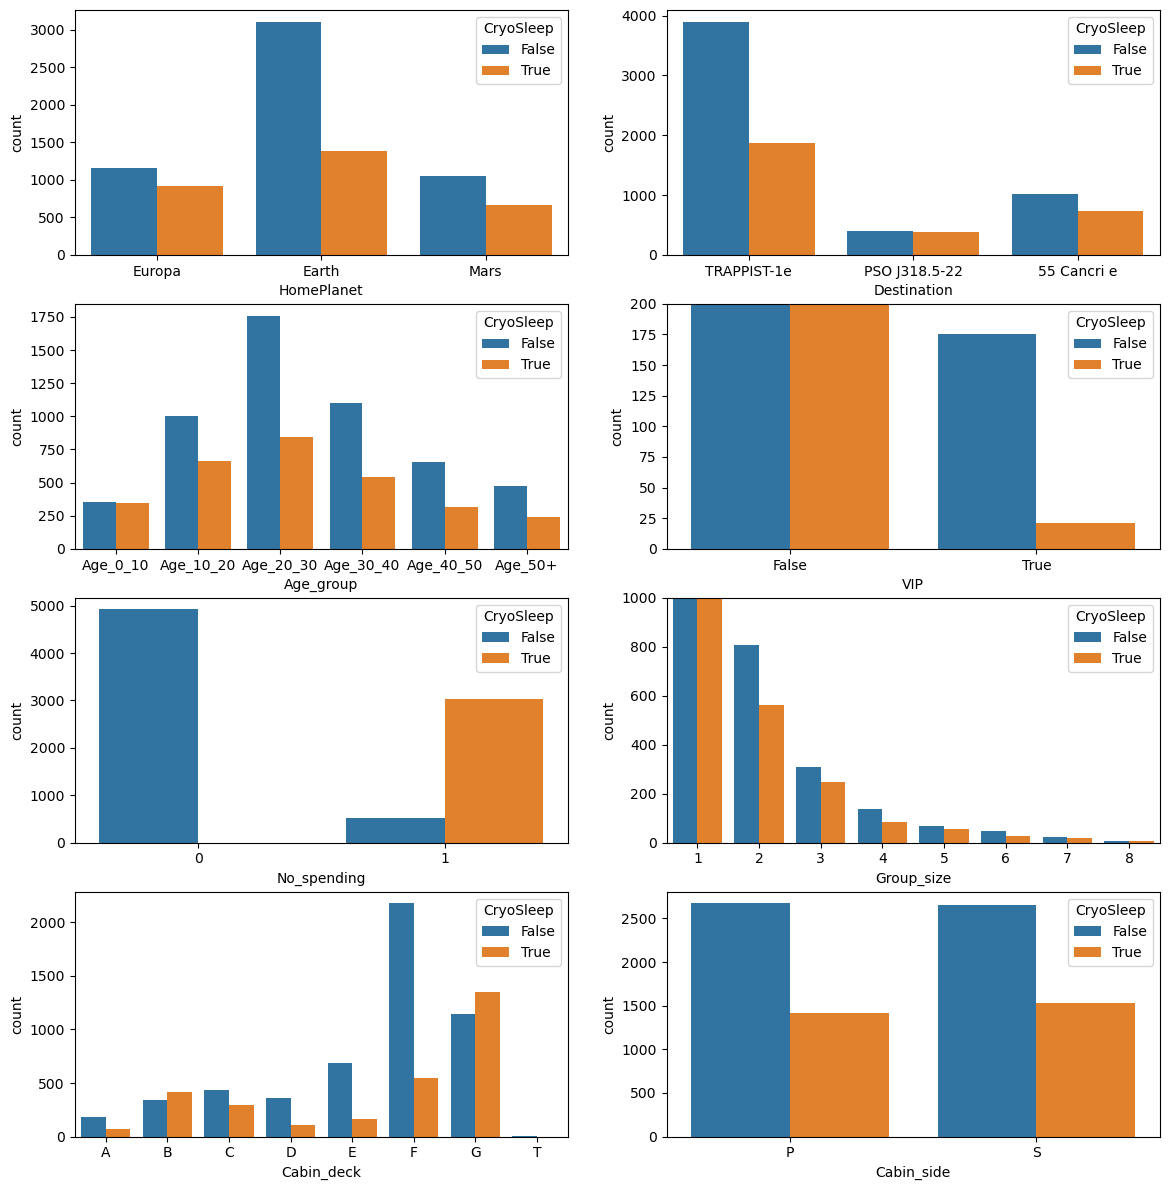

In [17]:
fig = plt.figure(figsize=(14,10))
plt.subplot(10,2,1)
plt.subplots_adjust(top = 3)
sns.countplot(data = all_data[0], x = 'HomePlanet', hue='CryoSleep')

plt.subplot(10,2,2)
sns.countplot(data = all_data[0], x = 'Destination', hue='CryoSleep')

plt.subplot(10,2,3)
sns.countplot(data = all_data[0], x = 'Age_group', hue='CryoSleep', \
              order=['Age_0_10','Age_10_20','Age_20_30','Age_30_40','Age_40_50','Age_50+'])

plt.subplot(10,2,4)
sns.countplot(data = all_data[0], x = 'VIP', hue='CryoSleep')
plt.ylim([0,200])

plt.subplot(10,2,5)
sns.countplot(data = all_data[0], x = 'No_spending', hue='CryoSleep')

plt.subplot(10,2,6)
sns.countplot(data = all_data[0], x = 'Group_size', hue='CryoSleep')
plt.ylim([0,1000])

plt.subplot(10,2,7)
sns.countplot(data = all_data[0], x = 'Cabin_deck', hue='CryoSleep',\
              order=['A','B','C','D','E','F','G','T'])

plt.subplot(10,2,8)
sns.countplot(data = all_data[0], x = 'Cabin_side', hue='CryoSleep')

In [18]:
for dataset in all_data:
    # All passengers who are not in a cryosleep, spend money
    print('#CryoSleep missing values before:',dataset.CryoSleep.isna().sum())
    dataset.loc[(dataset['No_spending'] == 0) & (dataset.CryoSleep.isna() == True), 'CryoSleep'] = False
    print('#CryoSleep missing values before:',dataset.CryoSleep.isna().sum())

#CryoSleep missing values before: 217
#CryoSleep missing values before: 98
#CryoSleep missing values before: 93
#CryoSleep missing values before: 38


<Axes: xlabel='Cabin_deck', ylabel='count'>

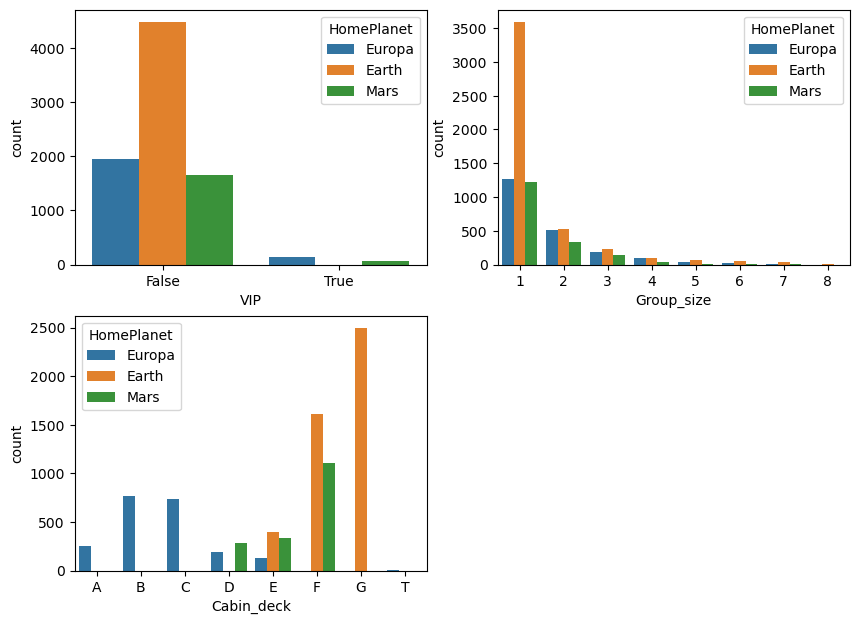

In [19]:
fig = plt.figure(figsize=(10,3))
plt.subplots_adjust(top = 3)

plt.subplot(3,2,1)
sns.countplot(data = all_data[0], x = 'VIP', hue='HomePlanet')

plt.subplot(3,2,2)
sns.countplot(data = all_data[0], x = 'Group_size', hue='HomePlanet')

plt.subplot(3,2,3)
sns.countplot(data = all_data[0], x = 'Cabin_deck', hue='HomePlanet',\
              order=['A','B','C','D','E','F','G','T'])

In [20]:
for dataset in all_data:   
    print('#HomePlanet missing values before:',dataset.HomePlanet.isna().sum())
    dataset.loc[(dataset['Cabin_deck'].isin(['A', 'B', 'C', 'T'])) &\
                    (dataset['HomePlanet'].isna() == True), 'HomePlanet'] = 'Europa'
    dataset.loc[(dataset['Cabin_deck'] == 'G') &\
                    (dataset['HomePlanet'].isna() == True), 'HomePlanet'] = 'Earth'
    print('#HomePlanet missing values before:',dataset.HomePlanet.isna().sum())

#HomePlanet missing values before: 201
#HomePlanet missing values before: 109
#HomePlanet missing values before: 87
#HomePlanet missing values before: 51


<Axes: xlabel='Group_size', ylabel='count'>

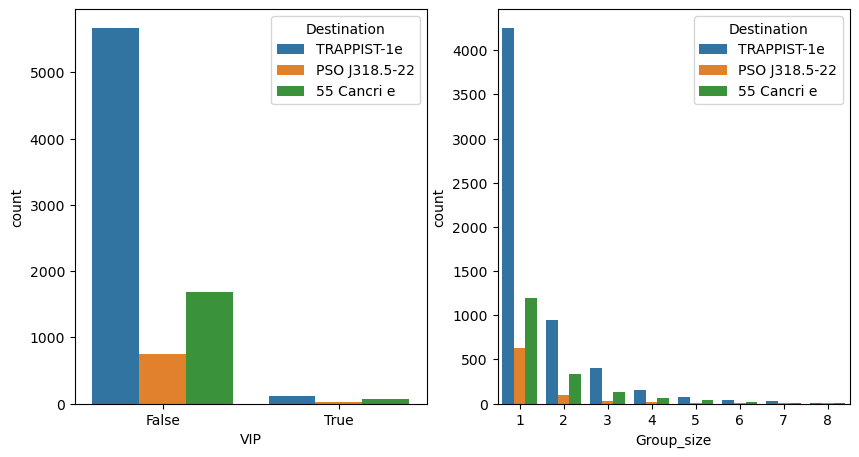

In [21]:
fig = plt.figure(figsize=(10,3))
plt.subplots_adjust(top = 3)

plt.subplot(2,2,1)
sns.countplot(data = all_data[0], x = 'VIP', hue='Destination')

plt.subplot(2,2,2)
sns.countplot(data = all_data[0], x = 'Group_size', hue='Destination')

In [22]:
for dataset in all_data:
    GHP_gb=dataset.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum()

    # Passengers with missing HomePlanet and in a group with known HomePlanet
    GHP_index=dataset[dataset['HomePlanet'].isna()]\
    [(dataset[dataset['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

    # Fill corresponding missing values
    dataset.loc[GHP_index,'HomePlanet']=dataset.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

#HomePlanet missing values before: 109
#HomePlanet missing values after: 63
#HomePlanet missing values before: 51
#HomePlanet missing values after: 31


In [23]:
# Replace NaN's with outliers for now (so we can split feature)
for dataset in all_data:
    dataset['Name'].fillna('Unknown Unknown', inplace=True)
    # New feature - Surname
    dataset['Surname']=dataset['Name'].str.split().str[-1]
     # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Surname']=='Unknown','Surname']=np.nan
    # Drop name (we don't need it anymore)
    dataset.drop('Name', axis=1, inplace=True)

    SHP_gb=dataset.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
    #  Everyone with the same surname comes from the same home planet.
    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum()

    # Passengers with missing HomePlanet and in a family with known HomePlanet
    SHP_index=dataset[dataset['HomePlanet'].isna()]\
    [(dataset[dataset['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

    # Fill corresponding missing values
    dataset.loc[SHP_index,'HomePlanet']=dataset.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

#HomePlanet missing values before: 63
#HomePlanet missing values after: 8
#HomePlanet missing values before: 31
#HomePlanet missing values after: 11


In [24]:
for dataset in all_data:
    HP_bef=dataset['HomePlanet'].isna().sum()

    # Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
    dataset.loc[(dataset['HomePlanet'].isna()) & ~(dataset['Cabin_deck']=='D'), 'HomePlanet']='Earth'
    dataset.loc[(dataset['HomePlanet'].isna()) & (dataset['Cabin_deck']=='D'), 'HomePlanet']='Mars'

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

#HomePlanet missing values before: 8
#HomePlanet missing values after: 0
#HomePlanet missing values before: 11
#HomePlanet missing values after: 0


In [25]:
# Fill missing Destination values with mode
for dataset in all_data:
    dataset.loc[(dataset['Destination'].isna()), 'Destination']='TRAPPIST-1e'

In [26]:
for dataset in all_data:
    GSN_gb=dataset[dataset['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

    # The majority (83%) of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.
    # Missing values before
    SN_bef=dataset['Surname'].isna().sum()

    # Passengers with missing Surname and in a group with known majority Surname
    GSN_index=dataset[dataset['Surname'].isna()]\
    [(dataset[dataset['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

    # Fill corresponding missing values
    dataset.loc[GSN_index,'Surname']=dataset.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Surname missing values before:',SN_bef)
    print('#Surname missing values after:',dataset['Surname'].isna().sum())

#Surname missing values before: 200
#Surname missing values after: 124
#Surname missing values before: 94
#Surname missing values after: 62


In [27]:
for dataset in all_data:
    # Joint distribution of Group and Cabin features
    GCD_gb=dataset[dataset['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
    GCN_gb=dataset[dataset['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
    GCS_gb=dataset[dataset['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

    # Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group.
    # Missing values before
    CS_bef=dataset['Cabin_side'].isna().sum()

    # Passengers with missing Cabin side and in a group with known Cabin side
    GCS_index=dataset[dataset['Cabin_side'].isna()]\
    [(dataset[dataset['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

    # Fill corresponding missing values
    dataset.loc[GCS_index,'Cabin_side']=dataset.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',dataset['Cabin_side'].isna().sum())

#Cabin_side missing values before: 199
#Cabin_side missing values after: 119
#Cabin_side missing values before: 100
#Cabin_side missing values after: 73


In [28]:
for dataset in all_data:
    # Missing values before
    CD_bef=dataset['Cabin_deck'].isna().sum()

    # Passengers with missing Cabin deck and in a group with known majority Cabin deck
    GCD_index=dataset[dataset['Cabin_deck'].isna()]\
    [(dataset[dataset['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index
    # Fill corresponding missing values
    dataset.loc[GCD_index,'Cabin_deck']=dataset.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',dataset['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 199
#Cabin_deck missing values before: 100
#Cabin_deck missing values after: 73


In [29]:
# Missing values before
CD_bef=all_data[0]['Cabin_deck'].isna().sum()

# Passengers with missing Cabin deck and in a group with known majority Cabin deck
GCD_index=all_data[0][all_data[0]['Cabin_deck'].isna()]\
[(all_data[0][all_data[0]['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index
print(GCD_index)
print('#Cabin_deck missing values before:',CD_bef)

Int64Index([], dtype='int64')
#Cabin_deck missing values before: 199


In [30]:
    # Missing values before
    CD_bef=dataset['Cabin_deck'].isna().sum()

    # Passengers with missing Cabin deck and in a group with known majority Cabin deck
    GCD_index=dataset[dataset['Cabin_deck'].isna()]\
    [(dataset[dataset['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

    dataset.loc[GCD_index,'Cabin_deck']=dataset.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',dataset['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 73
#Cabin_deck missing values after: 73


In [31]:
for dataset in all_data:
    # Fill missing values using the median
    dataset.loc[dataset['VIP'].isna(),'VIP']=False
    age_median = int(dataset[['Age']].median())
    dataset['Age'] = dataset['Age'].fillna(value=age_median)

In [32]:
for dataset in all_data:
    # Joint distribution
    dataset.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

    # Fill missing CryoSleep values using the mode
    na_rows_CSL=dataset.loc[dataset['CryoSleep'].isna(),'CryoSleep'].index
    dataset.loc[dataset['CryoSleep'].isna(),'CryoSleep']=\
    dataset.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

In [33]:
for dataset in all_data:
    SCS_gb=dataset[dataset['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

    # Ratio of sides
    SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

    # Missing values before
    CS_bef=dataset['Cabin_side'].isna().sum()

    # Passengers with missing Cabin side and in a family with known Cabin side
    SCS_index=dataset[dataset['Cabin_side'].isna()]\
    [(dataset[dataset['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

    # Fill corresponding missing values
    dataset.loc[SCS_index,'Cabin_side']=dataset.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

    # Drop surname (we don't need it anymore)
    dataset.drop('Surname', axis=1, inplace=True)

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',dataset['Cabin_side'].isna().sum())

    dataset['Solo']=(dataset['Group_size']==1).astype(int)

    # Joint distribution
    dataset.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
    '''
    Passengers from Mars are most likely in deck F.
    Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.
    Passengers from Earth are (more or less) most likely in deck G.
    We will fill in missing values according to where the mode appears in these subgroups.
    '''
    # Missing values before
    CD_bef=dataset['Cabin_deck'].isna().sum()

    # Fill missing values using the mode
    na_rows_CD=dataset.loc[dataset['Cabin_deck'].isna(),'Cabin_deck'].index
    dataset.loc[dataset['Cabin_deck'].isna(),'Cabin_deck']=\
    dataset.groupby(['HomePlanet','Destination','Solo'])\
                         ['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',dataset['Cabin_deck'].isna().sum())


    # Value counts
    dataset['Cabin_side'].value_counts()

    # Missing values before
    CS_bef=dataset['Cabin_side'].isna().sum()

    # Fill remaining missing values with outlier
    dataset.loc[dataset['Cabin_side'].isna(),'Cabin_side']='Z'

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',dataset['Cabin_side'].isna().sum())

    # Missing values before
    CN_bef=dataset['Cabin_number'].isna().sum()
    print('#Cabin_number missing values before:',CN_bef)
    # Extrapolate linear relationship on a deck by deck basis
    for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        # Features and labels
        X_CN=dataset.loc[~(dataset['Cabin_number'].isna()) & (dataset['Cabin_deck']==deck),'Group']
        y_CN=dataset.loc[~(dataset['Cabin_number'].isna()) & (dataset['Cabin_deck']==deck),'Cabin_number']
        X_test_CN=dataset.loc[(dataset['Cabin_number'].isna()) & (dataset['Cabin_deck']==deck),'Group']

        if not X_test_CN.empty:
            # Linear regression
            model_CN=LinearRegression()
            model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
            preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))

            # Fill missing values with predictions
            dataset.loc[(dataset['Cabin_number'].isna()) & \
                             (dataset['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)

    # Print number of missing values left
    print('#Cabin_number missing values before:',CN_bef)
    print('#Cabin_number missing values after:',dataset['Cabin_number'].isna().sum())

#     # One-hot encode cabin regions
#     dataset['Cabin_region1']=(dataset['Cabin_number']<300).astype(int)
#     dataset['Cabin_region2']=((dataset['Cabin_number']>=300) & (dataset['Cabin_number']<600)).astype(int)
#     dataset['Cabin_region3']=((dataset['Cabin_number']>=600) & (dataset['Cabin_number']<900)).astype(int)
#     dataset['Cabin_region4']=((dataset['Cabin_number']>=900) & (dataset['Cabin_number']<1200)).astype(int)
#     dataset['Cabin_region5']=((dataset['Cabin_number']>=1200) & (dataset['Cabin_number']<1500)).astype(int)
#     dataset['Cabin_region6']=((dataset['Cabin_number']>=1500) & (dataset['Cabin_number']<1800)).astype(int)
#     dataset['Cabin_region7']=(dataset['Cabin_number']>=1800).astype(int)

    dataset['Expenditure'] = dataset[exp_feats].sum(axis=1)
    for col in exp_feats:
        dataset.loc[(dataset[col].isna()) & (dataset['CryoSleep']==True), col]=0
    dataset

#Cabin_side missing values before: 119
#Cabin_side missing values after: 70
#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 0
#Cabin_side missing values before: 70
#Cabin_side missing values after: 0
#Cabin_number missing values before: 199
#Cabin_number missing values before: 199
#Cabin_number missing values after: 0
#Cabin_side missing values before: 73
#Cabin_side missing values after: 51
#Cabin_deck missing values before: 73
#Cabin_deck missing values after: 0
#Cabin_side missing values before: 51
#Cabin_side missing values after: 0
#Cabin_number missing values before: 100
#Cabin_number missing values before: 100
#Cabin_number missing values after: 0


In [34]:
for dataset in all_data:
    # Fill remaining missing values using the median
    for col in exp_feats:
        median = int(dataset[[col]].median())
        dataset[col] = dataset[col].fillna(value=median)

In [35]:
all_data[1].isnull().sum().sort_values(ascending=False)

Age_group       91
PassengerId      0
Na_count         0
Cabin_side       0
Cabin_number     0
Cabin_deck       0
Group            0
Group_size       0
No_spending      0
Expenditure      0
VRDeck           0
HomePlanet       0
Spa              0
ShoppingMall     0
FoodCourt        0
RoomService      0
VIP              0
Age              0
Destination      0
CryoSleep        0
Solo             0
dtype: int64

In [36]:
all_data[0].columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Age_group', 'Expenditure', 'No_spending', 'Group_size',
       'Group', 'Cabin_deck', 'Cabin_number', 'Cabin_side', 'Na_count',
       'Solo'],
      dtype='object')

In [37]:
label = LabelEncoder()
for dataset in all_data:
    dataset['HomePlanet_Code'] = label.fit_transform(dataset['HomePlanet'])
    dataset['CryoSleep_Code'] = label.fit_transform(dataset['CryoSleep'])
    dataset['Destination_Code'] = label.fit_transform(dataset['Destination'])
    dataset['VIP_Code'] = label.fit_transform(dataset['VIP'])
    dataset['Cabin_deck_Code'] = label.fit_transform(dataset['Cabin_deck'])
    dataset['Cabin_side_Code'] = label.fit_transform(dataset['Cabin_side'])
all_data[0]['Transported_Code'] = label.fit_transform(df_train_tmp['Transported'])

In [38]:
# define y variable aka target/outcome
Target = ['Transported_Code']

data_x_calc = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',\
                'Group_size', 'Cabin_number', 'HomePlanet_Code', 'CryoSleep_Code',\
                'Destination_Code', 'VIP_Code', 'Cabin_deck_Code', 'Cabin_side_Code'] 

<Axes: >

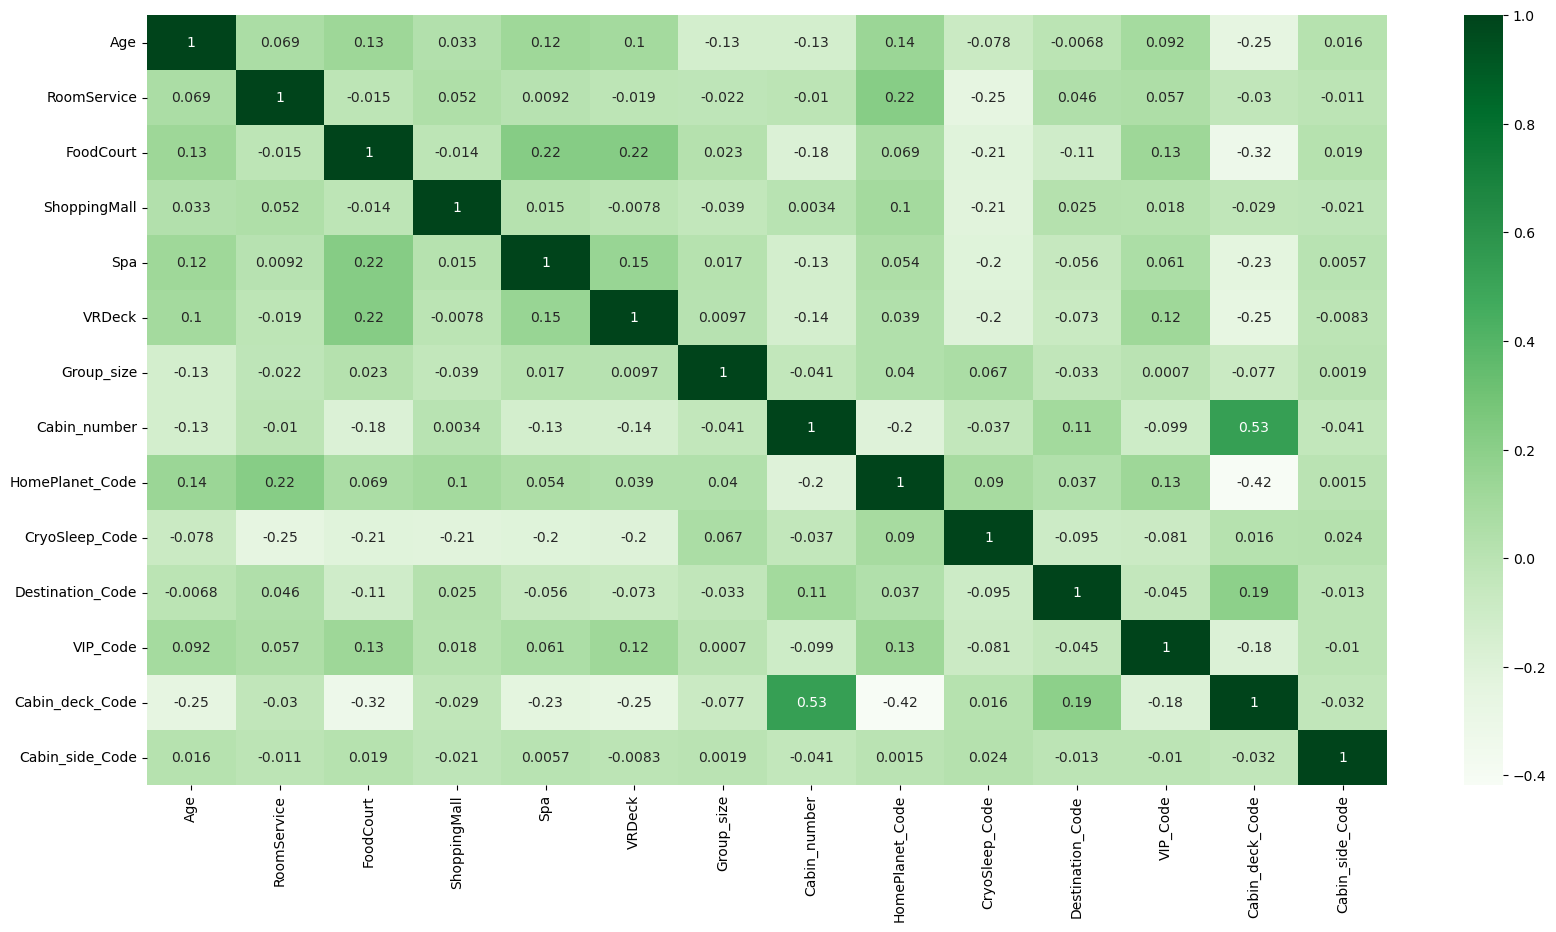

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(all_data[0][data_x_calc].corr(), cmap='Greens', annot=True)

In [40]:
X = all_data[0][data_x_calc]
y = all_data[0][Target]
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    test_size=0.2, random_state=42)

In [41]:
# Random Forest, метод главных компонент и оптимизация гиперпараметров
clf = RandomForestClassifier(random_state=42)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(clf, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train.values.ravel())
rs.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 18,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [42]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

In [43]:
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,100,2,18,sqrt,15,False,0.806874,1
1,500,12,18,sqrt,13,False,0.805867,2
2,700,2,2,log2,11,True,0.804717,3
3,300,2,23,log2,14,False,0.804717,3
4,1000,44,23,log2,12,False,0.804573,5
5,700,23,7,log2,15,False,0.804573,6
6,500,39,18,sqrt,11,False,0.804429,7
7,700,7,23,log2,12,False,0.804142,8
8,600,50,23,sqrt,14,False,0.804142,8
9,300,28,7,log2,13,True,0.803998,10


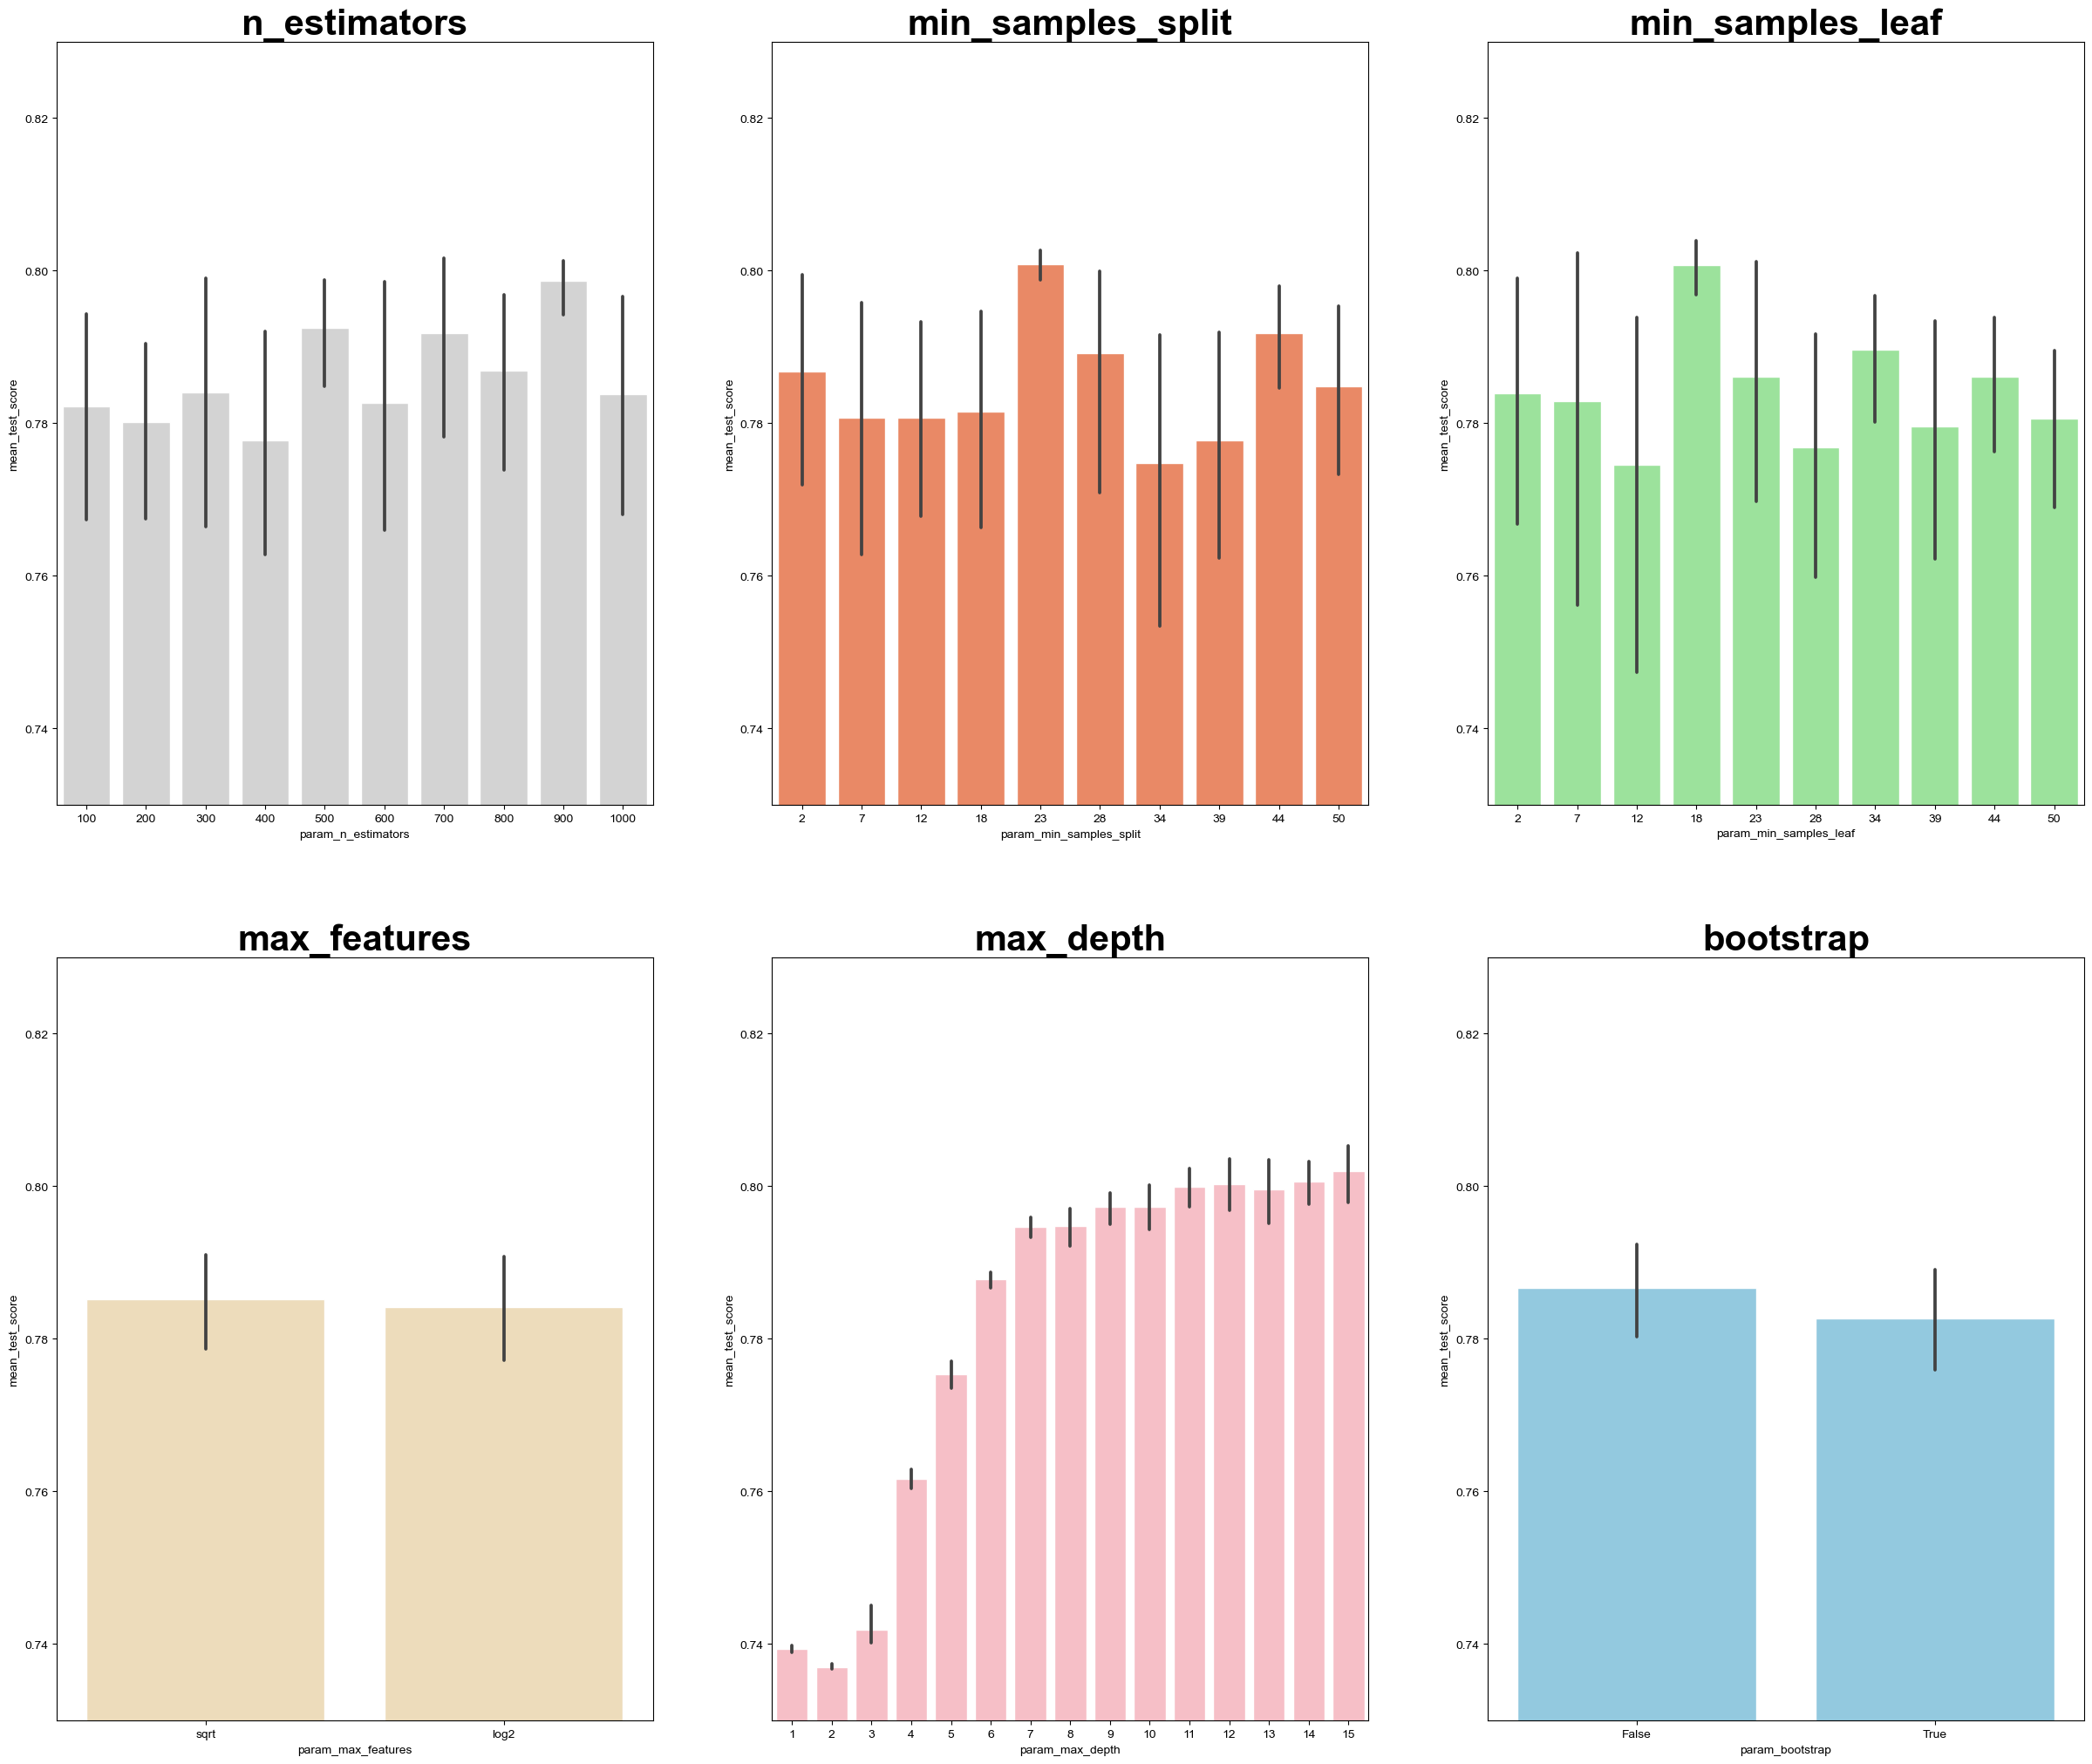

In [44]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.73,.83])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.73,.83])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.73,.83])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.73,.83])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.73,.83])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.73,.83])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [45]:
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 10, stop = 25, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 18, stop = 48, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 12, stop = 42, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(clf, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train.values.ravel())
rs.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 666,
 'min_samples_split': 31,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 23,
 'bootstrap': False}

In [46]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

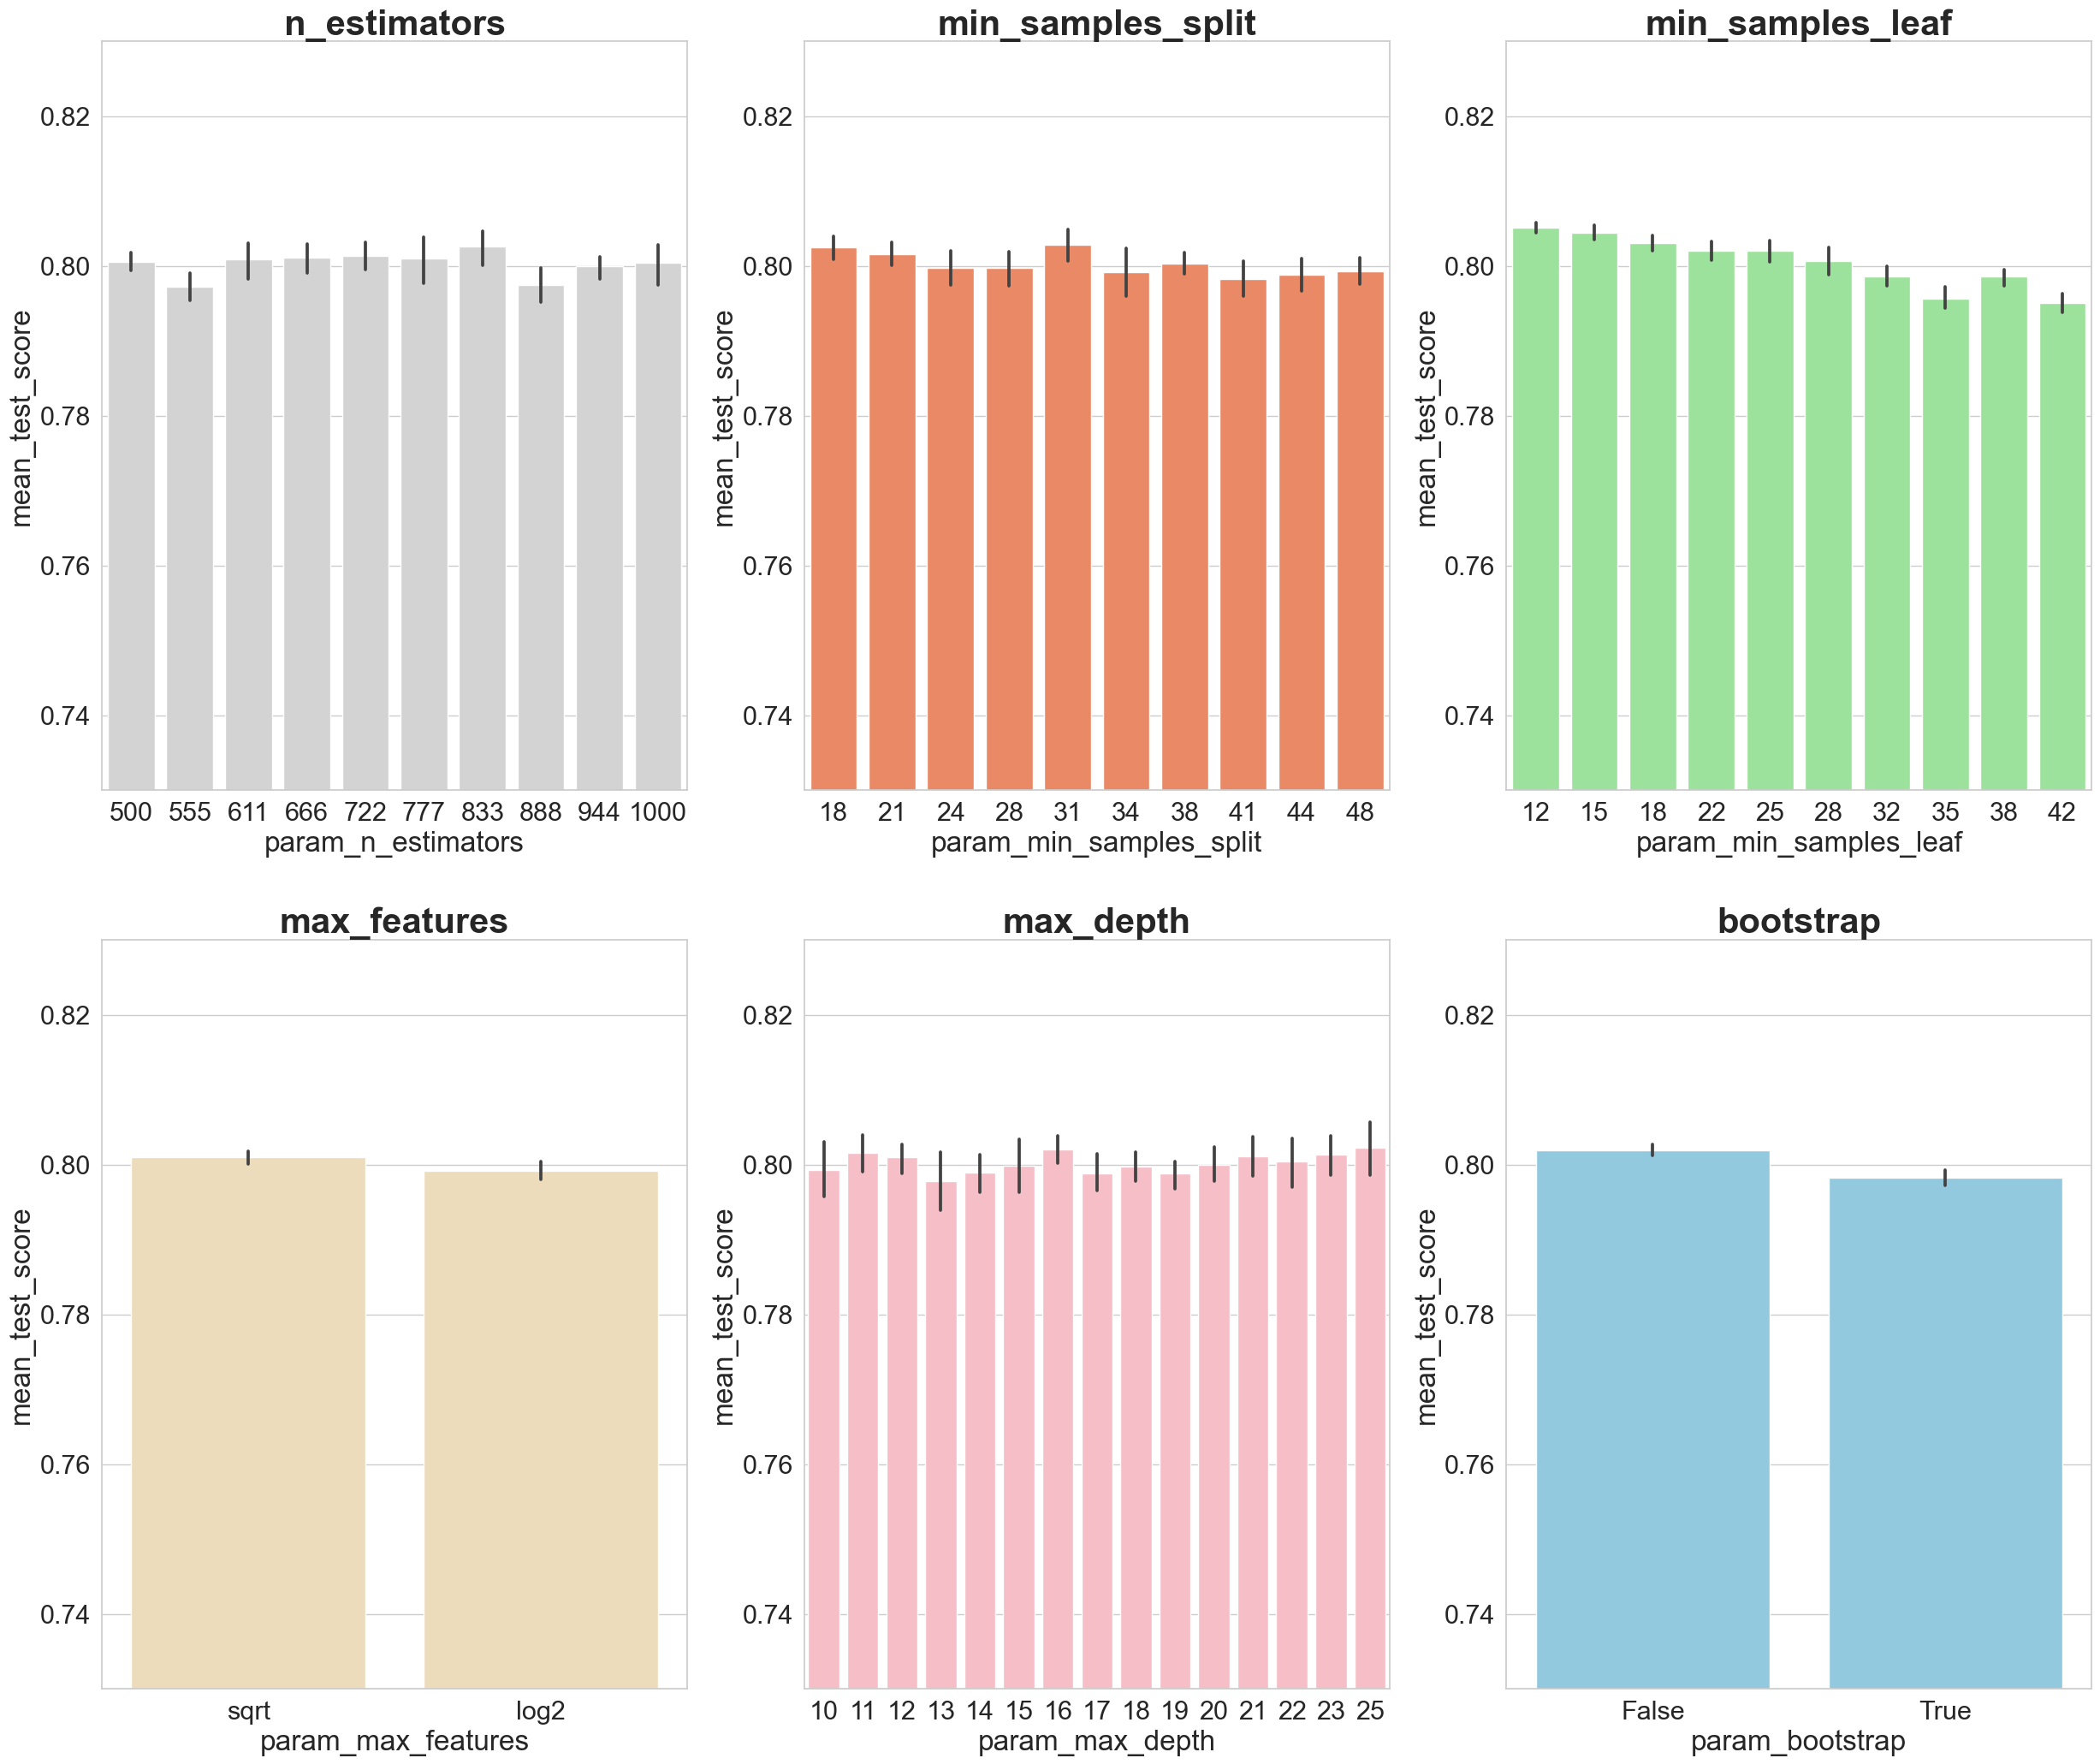

In [47]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.73,.83])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.73,.83])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.73,.83])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.73,.83])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.73,.83])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.73,.83])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV
# n_estimators = [500,833,800]
# max_features = ['sqrt']
# max_depth = [15,16,25]
# min_samples_split = [21,31,44]
# min_samples_leaf = [12,15,18,38,44]
n_estimators = [500]
max_features = ['sqrt']
max_depth = [16]
min_samples_split = [31]
min_samples_leaf = [12]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(clf, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train.values.ravel())
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'bootstrap': False,
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 12,
 'min_samples_split': 31,
 'n_estimators': 500}

In [49]:
y_pred_gs = gs.best_estimator_.predict(X_test)
len(y_pred_gs)
from sklearn.metrics import confusion_matrix
conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_gs),
                                     index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

In [50]:
from sklearn.metrics import recall_score
display(conf_matrix_tuned_pca)
display('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score', recall_score(y_test, y_pred_gs))

,predicted 0,predicted 1
actual 0,655,206
actual 1,158,720


'Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score'

0.8200455580865603

In [51]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_gs, average='binary')

0.7982261640798226

In [52]:
X_fin = all_data[1][data_x_calc]
final_y_pred_gs = gs.best_estimator_.predict(X_fin)
all_data[1]['Transported'] = final_y_pred_gs
all_data[1]
all_data[1]['Transported'] = all_data[1]['Transported'].astype (bool)

In [53]:
submit = all_data[1][['PassengerId','Transported']]
submit.to_csv("submission.csv", index=False)